# 0. Import Packages

## 0.1 Basic Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 0.2 SKLearn Packages

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier

## 0.3 NLTK Packages

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer

In [4]:
from textblob import Word 
from wordcloud import WordCloud
from collections import Counter

In [5]:

# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences


In [6]:
from imblearn.over_sampling import SMOTE
import re

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sport\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sport\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sport\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\sport\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\sport\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\sport\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\

True

# 1. Read Data

In [8]:
# import os
# print(os.getcwd())

In [9]:
file_path = '01 Data/Dataset_Public.xlsx'
data = pd.read_excel(file_path)

print(f'File Dimensions : {data.shape}')
data.head()

File Dimensions : (191690, 3)


,Claim Description,Coverage Code,Accident Source
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...,AN,"Struck pedestrian, bicycle"
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...,GB,Elevator/Escalator
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL...",AB,Sideswipe or lane change
3,CLAIMANT ALLEGES SHE WAS BURNED UNKNOWN DEGREE...,PA,Food Product
4,THE IV WAS MERGING INTO A CONSTRUCTION ZONE WH...,AD,Struck vehicle in rear


In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191690 entries, 0 to 191689
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Claim Description  191463 non-null  object
 1   Coverage Code      191690 non-null  object
 2   Accident Source    191690 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [11]:
data['Accident Source'].value_counts(normalize=True)

Accident Source
Alleged Negligent Act                     0.111033
Sideswipe or lane change                  0.100266
Struck vehicle in rear                    0.055694
Not Otherwise Classified                  0.043607
Struck animal or object                   0.042751
                                            ...   
Contract Hauler Accident/Temp Employee    0.000089
VEHICLE                                   0.000083
Insured Lost Control                      0.000083
Boiler, pressure vessel, etc.             0.000083
Natural Hazard-Vegetation                 0.000083
Name: proportion, Length: 312, dtype: float64

In [12]:
data['Accident Source'].value_counts()

Accident Source
Alleged Negligent Act                     21284
Sideswipe or lane change                  19220
Struck vehicle in rear                    10676
Not Otherwise Classified                   8359
Struck animal or object                    8195
                                          ...  
Contract Hauler Accident/Temp Employee       17
VEHICLE                                      16
Insured Lost Control                         16
Boiler, pressure vessel, etc.                16
Natural Hazard-Vegetation                    16
Name: count, Length: 312, dtype: int64

In [13]:
data['Accident Source'].nunique()

312

In [14]:
data['Accident Source'].isna().sum()

np.int64(0)

# 2. Preprocessing

In [15]:
data.drop('Coverage Code', axis=1, inplace=True)

In [16]:
data['Claim Description'] = data['Claim Description'].astype(str)
data['lower_case'] = data['Claim Description'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

data['alphabatic'] = data['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
data['without-link'] = data['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
data['Special_word'] = data.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)  

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

data['stop_words'] = data['Special_word'].apply(lambda x: [item for item in x if item not in stop])
data['stop_words'] = data['stop_words'].astype('str')

data['short_word'] = data['stop_words'].str.findall('\w{2,}')
data['string']=data['short_word'].str.join(' ') 
 
data['Text'] = data['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

<>:15: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sport\AppData\Local\Temp\ipykernel_13692\218050196.py:15: SyntaxWarning: invalid escape sequence '\w'
  data['short_word'] = data['stop_words'].str.findall('\w{2,}')


In [17]:
data[['Claim Description', 'Text']].head()

,Claim Description,Text
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...,iv making left turn green arrow pedestrian ran...
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...,claimant alleges she suffered injury elevator
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL...",iv passenger sustained injury ov iv collided c...
3,CLAIMANT ALLEGES SHE WAS BURNED UNKNOWN DEGREE...,claimant alleges she burned unknown degree hot...
4,THE IV WAS MERGING INTO A CONSTRUCTION ZONE WH...,iv merging construction zone rear ended theov ...


# 3. Data EDA

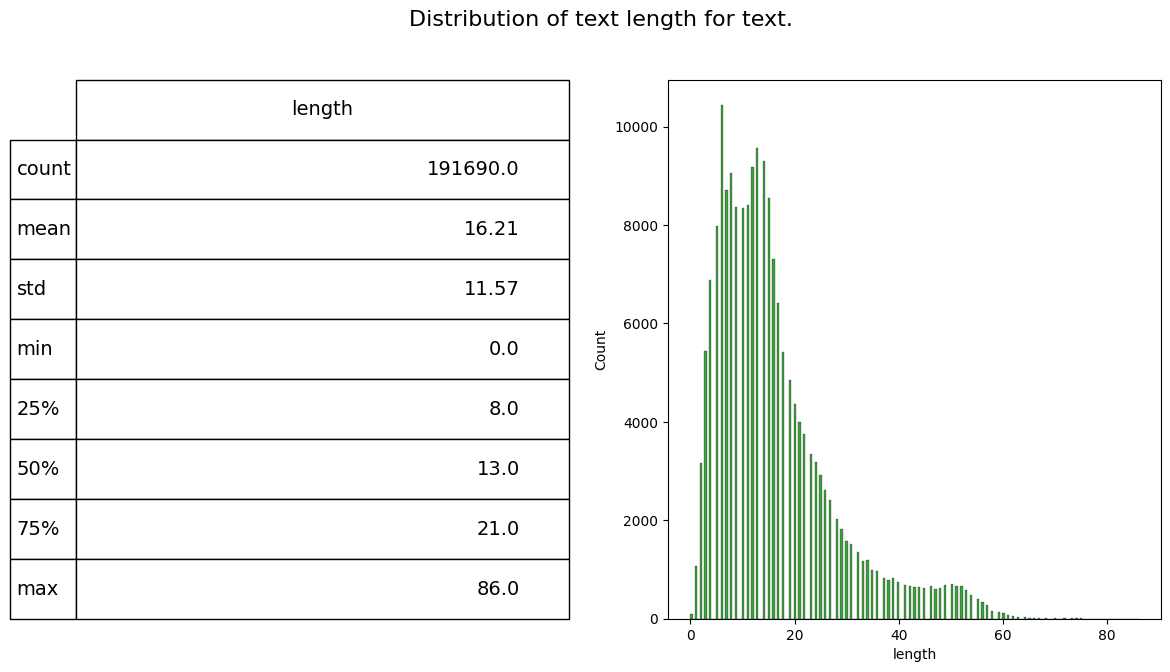

In [18]:

fig = plt.figure(figsize=(14,7))
data['length'] = data.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data['length'], ax=ax1,color='green')
describe = data.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

In [19]:

top = Counter([item for sublist in data['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

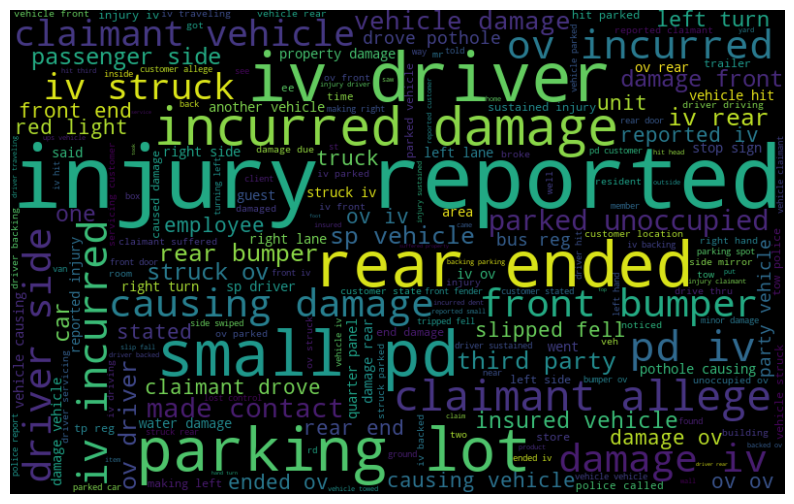

In [20]:

normal_words =' '.join([text for text in data['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=99, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
     

# 4. N-Gram

In [21]:
import numpy as np

# Path to GloVe file
glove_path = "glove\glove.6B.100d.txt"  # Adjust path if necessary

# Load GloVe embeddings
embedding_index = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

print(f"Loaded {len(embedding_index)} word vectors.")


<>:4: SyntaxWarning:

invalid escape sequence '\g'

<>:4: SyntaxWarning:

invalid escape sequence '\g'

C:\Users\sport\AppData\Local\Temp\ipykernel_13692\2395623016.py:4: SyntaxWarning:

invalid escape sequence '\g'



Loaded 400000 word vectors.


In [22]:
X = data['Text']
y = data['Accident Source']

# 5. Train Test Split

In [23]:
from tensorflow.keras.utils import to_categorical


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [25]:
all_labels = y
# all_labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

LabelEncoder()

In [26]:

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [27]:
num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes=num_classes)


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set parameters
max_words = 10000  # Maximum vocabulary size
embedding_dim = 100  # GloVe dimensions
max_sequence_length = 100  # Max length of each input sequence

# Tokenize your text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Convert text data to padded sequences
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_sequence_length)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_sequence_length)

# Prepare embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim,
              weights=[embedding_matrix], trainable=False),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
    ])

    # Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "AUC"])

# Set up ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-5, verbose=2)


In [ ]:
from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import NearMiss
from sklearn.utils import class_weight

# Generate balanced batches
sampler = NearMiss()  # Undersampling strategy
batch_size = 128#32
training_generator, steps_per_epoch = balanced_batch_generator(
    X_train_seq, y_train_cat, sampler=sampler, batch_size=batch_size, random_state=99
)

# Train the model
history = model.fit(
    training_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=(X_test_seq, y_test_cat),
    callbacks=[reduce_lr]
)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - AUC: 0.5000 - accuracy: 0.0024 - loss: 5.7407 - val_AUC: 0.4990 - val_accuracy: 0.0013 - val_loss: 5.7552 - learning_rate: 0.0010
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - AUC: 0.5046 - accuracy: 0.0083 - loss: 5.6958 - val_AUC: 0.4720 - val_accuracy: 0.0023 - val_loss: 5.8258 - learning_rate: 0.0010
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - AUC: 0.5388 - accuracy: 0.0138 - loss: 5.5953 - val_AUC: 0.4857 - val_accuracy: 0.0042 - val_loss: 5.9036 - learning_rate: 0.0010
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - AUC: 0.6184 - accuracy: 0.0248 - loss: 5.4492 - val_AUC: 0.5003 - val_accuracy: 0.0071 - val_loss: 5.9427 - learning_rate: 0.0010
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - AUC: 0.6759 - accuracy: 0.0290 - loss: 5.2864 - val_AUC: 0.5213 - val_accuracy: 0.0087 - val_loss: 5.9462 - learning_rate: 0.0010
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - AUC: 0.7128 - accuracy: 0.0410 - los

In [ ]:
# Evaluate the model on test data
y_pred = model.predict(X_test_seq)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step
              precision    recall  f1-score   support

           0       0.02      0.01      0.01       106
           1       0.05      0.36      0.09        22
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        17
           4       0.01      0.17      0.01        12
           5       0.00      0.00      0.00        34
           6       0.88      0.68      0.77        34
           7       0.00      0.00      0.00      4198
           8       0.00      0.00      0.00         2
           9       0.01      0.25      0.02         8
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00       408
          12       0.09      0.01      0.01       442
          13       0.00      0.00      0.00       384
          14       0.33      0.17      0.22       474
          15       0.00      0.00      0.00        15
          16       0.00      0.00   

d:\01 Work\01 Coding\02-Practice\02 NLP\01 Accidents\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\01 Work\01 Coding\02-Practice\02 NLP\01 Accidents\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

d:\01 Work\01 Coding\02-Practice\02 NLP\01 Accidents\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\01 Work\01 Coding\02-Practice\02 NLP\01 Accidents\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-de